<a href="https://colab.research.google.com/github/yoe174/PCVK_27_3C/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modul 5**

## Tugas Praktikum 1
Buat Gamma Correction sesuai dengan petunjuk berikut

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import math

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai kecerahan : 3


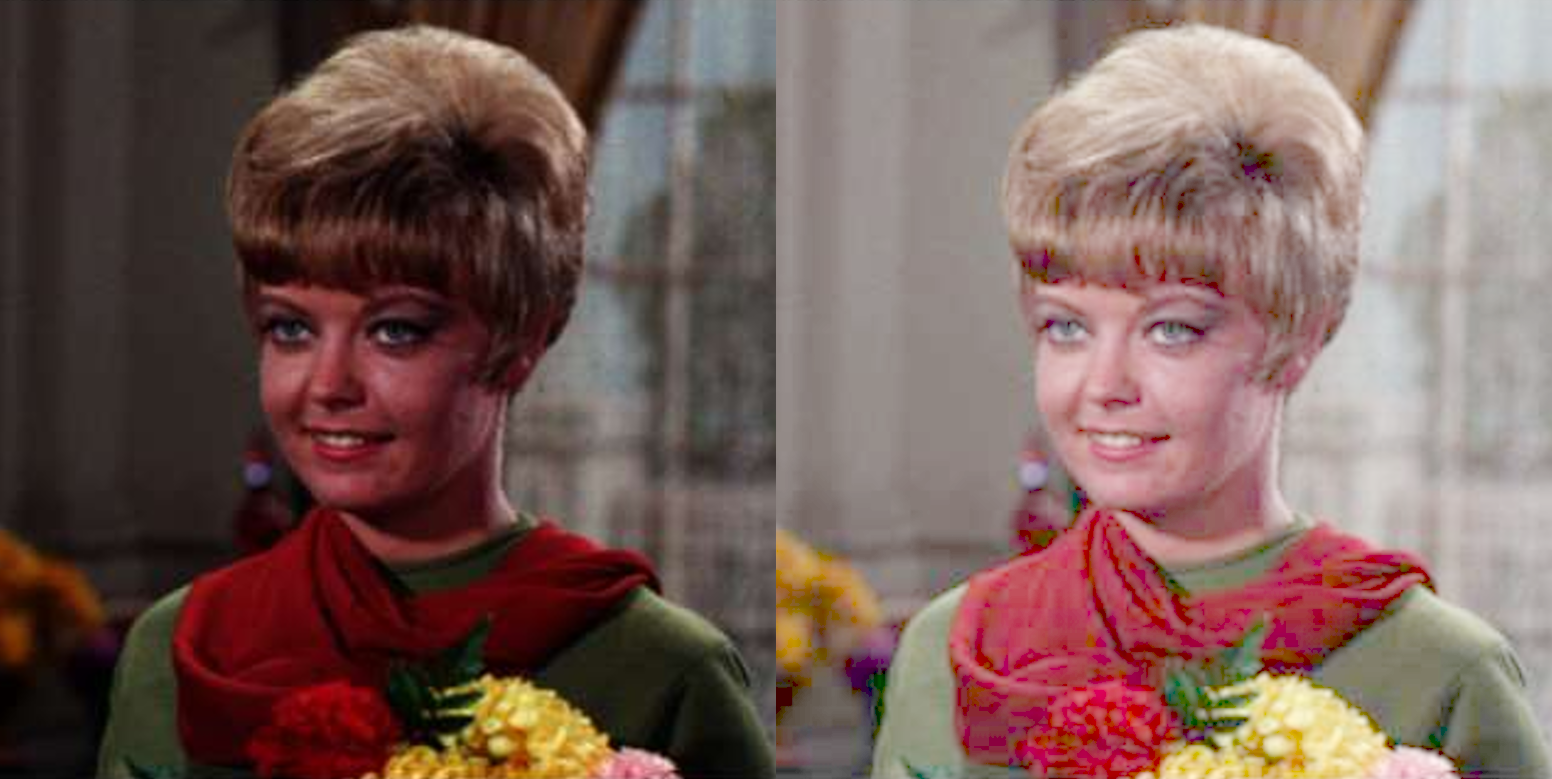

In [10]:
print (' Gamma Correction pada citra ')
print ('----------------------------------')
try:
  gamma =int(input('Masukkan nilai kecerahan : '))
except ValueError :
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.png')
gamma_image = np.zeros(original.shape, original.dtype)

# Akses per piksel menggunakan gamma correction
inv_gamma = 1.0 / gamma

# Membuat lookup table untuk mempercepat penghitungan
lookup_table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype('uint8')

# Terapkan lookup table ke citra
gamma_image = cv.LUT(original, lookup_table)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

## Tugas Praktikum 2
Buat Simulasi Image Depth

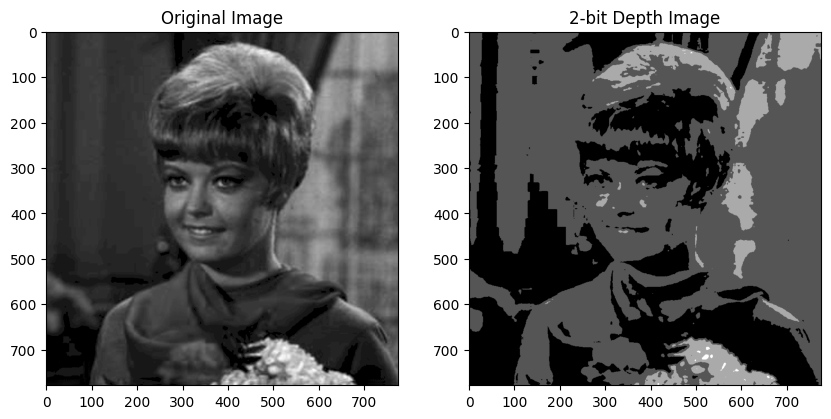

In [11]:
# Bit depth dan level
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca gambar dan membuat citra dengan kedalaman tertentu
original = cv.imread('/content/drive/MyDrive/PCVK/female.png', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Mengakses tiap piksel dan menerapkan kuantisasi
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        depth_image[y, x] = round(original[y, x] / level) * level

# Gabungkan hasil gambar untuk ditampilkan
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(original, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(depth_image, cmap='gray')
ax[1].set_title(f'{bit_depth}-bit Depth Image')
plt.show()

## Tugas Praktikum 3
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya

In [24]:
import glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

In [13]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

In [8]:
def avg_denoising(imgs):
    height, width, channels = imgs[0].shape
    sum_img = np.zeros((height, width, channels))

    # Menjumlahkan setiap gambar
    for img in imgs:
        sum_img += img

    # Menghitung rata-rata citra
    average_image = sum_img / len(imgs)

    # Mengatur nilai pixel agar berada dalam rentang 0-255 dan mengubah tipe data
    avg_image = np.clip(average_image, 0, 255).astype(np.uint8)

    return avg_image

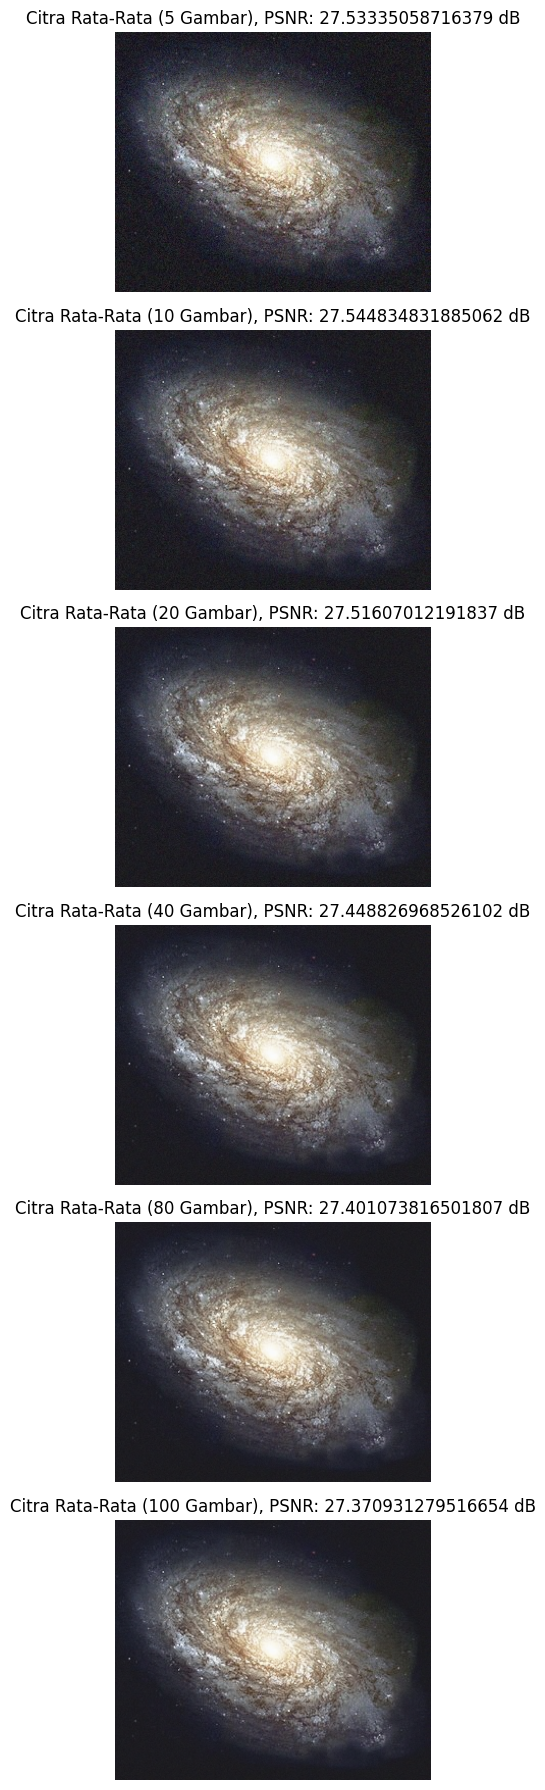

In [26]:
# Membaca citra asli
original_img = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Daftar jumlah gambar yang ingin digunakan
num_images_list = [5, 10, 20, 40, 80, 100]

plt.figure(figsize=(20, 18))

for i, num_image in enumerate(num_images_list):
  avg_img = avg_denoising(cv_img[:num_image])
  # Menghitung nilai PSNR
  psnr_value = PSNR(original_img, avg_img)
  # Menampilkan gambar rata-rata
  plt.subplot(len(num_images_list), 1, i + 1)
  plt.imshow(cv.cvtColor(avg_img, cv.COLOR_BGR2RGB))
  plt.title(f'Citra Rata-Rata ({num_image} Gambar), PSNR: {psnr_value} dB')
  plt.axis('off')

plt.tight_layout()
plt.show()

### kesimpulan
kesimpulan utamanya adalah bahwa dengan bertambahnya jumlah gambar yang digunakan untuk perhitungan rata-rata, kualitas gambar hasil akan semakin baik, yang diindikasikan dengan peningkatan nilai PSNR. Teknik rata-rata adalah metode yang efektif untuk mengurangi noise, terutama ketika tersedia banyak gambar dengan karakteristik noise yang berbeda-beda

## Tugas Praktikum 4
Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

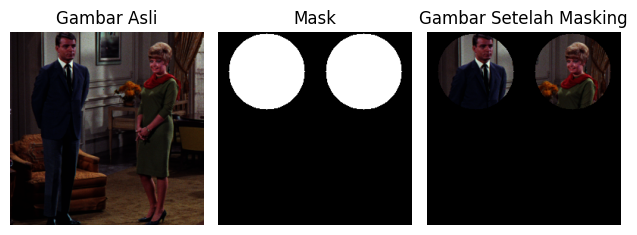

In [17]:
# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

# Mendapatkan dimensi gambar
height, width = ori.shape[:2]

# Membuat mask berbentuk lingkaran (di tengah gambar)
mask = np.zeros((height, width), dtype=np.uint8)
cv.circle(mask, center=(int(width*0.25),53), radius=50, color=255, thickness=-1)
cv.circle(mask, center=(int(width*0.75), 53), radius=50, color=255, thickness=-1)

masked_image = cv.bitwise_and(ori, ori, mask=mask)

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(ori, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(masked_image, cv.COLOR_BGR2RGB))
plt.title('Gambar Setelah Masking')
plt.axis('off')

plt.tight_layout()
plt.show()

## Tugas praktikum 5
Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

### NOT

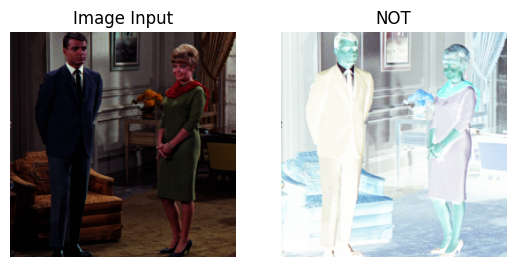

In [32]:
# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

# Menampilkan gambar asli
plt.subplot(1, 2, 1)  # Mengatur subplot 1 baris, 2 kolom, dan ini posisi pertama
plt.imshow(cv.cvtColor(ori, cv.COLOR_BGR2RGB))
plt.title('Image Input')
plt.axis('off')

# Melakukan operasi NOT pada citra
masked_not = cv.bitwise_not(ori)

# Menampilkan hasil operasi NOT
plt.subplot(1, 2, 2)  # Posisi kedua dari subplot
plt.imshow(cv.cvtColor(masked_not, cv.COLOR_BGR2RGB))
plt.title('NOT')
plt.axis('off')

plt.show()

### OR

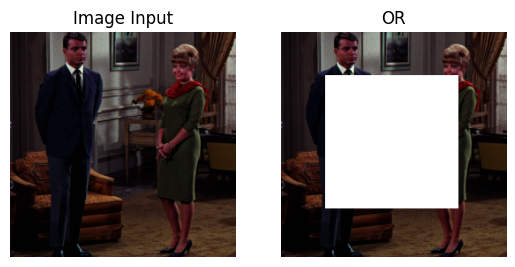

In [33]:

# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

# Membuat mask sebagai contoh untuk operasi OR (dalam hal ini, kotak putih di tengah)
mask = np.zeros_like(ori, dtype=np.uint8)
cv.rectangle(mask, (50, 50), (200, 200), (255, 255, 255), -1)

# Melakukan operasi OR pada citra dengan mask
masked_or = cv.bitwise_or(ori, mask)

# Menampilkan gambar asli
plt.subplot(1, 2, 1)  # Mengatur subplot 1 baris, 2 kolom, posisi pertama
plt.imshow(cv.cvtColor(ori, cv.COLOR_BGR2RGB))
plt.title('Image Input')
plt.axis('off')

# Menampilkan hasil operasi OR
plt.subplot(1, 2, 2)  # Posisi kedua dari subplot
plt.imshow(cv.cvtColor(masked_or, cv.COLOR_BGR2RGB))
plt.title('OR')
plt.axis('off')

# Menampilkan kedua gambar
plt.show()

### AND

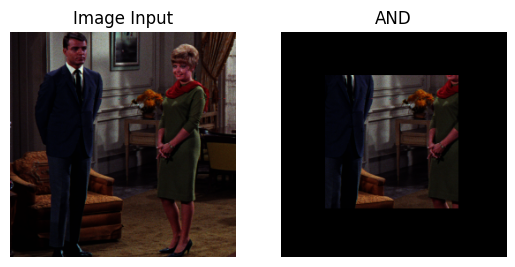

In [38]:
# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

# Membuat mask sebagai contoh untuk operasi AND
mask = np.zeros_like(ori, dtype=np.uint8)
cv.rectangle(mask, (50, 50), (200, 200), (255, 255, 255), -1)

# Melakukan operasi AND pada citra dengan mask
masked_and = cv.bitwise_and(ori, mask)

# Menampilkan gambar asli
plt.subplot(1, 2, 1)  # Mengatur subplot 1 baris, 2 kolom, posisi pertama
plt.imshow(cv.cvtColor(ori, cv.COLOR_BGR2RGB))
plt.title('Image Input')
plt.axis('off')

# Menampilkan hasil operasi AND
plt.subplot(1, 2, 2)  # Posisi kedua dari subplot
plt.imshow(cv.cvtColor(masked_and, cv.COLOR_BGR2RGB))
plt.title('AND')
plt.axis('off')

# Menampilkan kedua gambar
plt.show()

### NAND

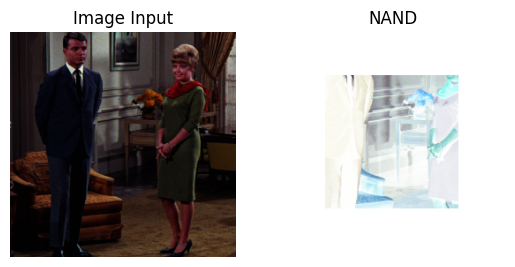

In [35]:
# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

# Membuat mask sebagai contoh untuk operasi NAND (kotak putih di tengah)
mask = np.zeros_like(ori, dtype=np.uint8)
cv.rectangle(mask, (50, 50), (200, 200), (255, 255, 255), -1)

# Melakukan operasi AND pada citra dengan mask
masked_and = cv.bitwise_and(ori, mask)

# Melakukan operasi NOT untuk mendapatkan hasil NAND
masked_nand = cv.bitwise_not(masked_and)

# Menampilkan gambar asli
plt.subplot(1, 2, 1)  # Mengatur subplot 1 baris, 2 kolom, posisi pertama
plt.imshow(cv.cvtColor(ori, cv.COLOR_BGR2RGB))
plt.title('Image Input')
plt.axis('off')

# Menampilkan hasil operasi NAND
plt.subplot(1, 2, 2)  # Posisi kedua dari subplot
plt.imshow(cv.cvtColor(masked_nand, cv.COLOR_BGR2RGB))
plt.title('NAND')
plt.axis('off')

# Menampilkan kedua gambar
plt.show()

### XOR

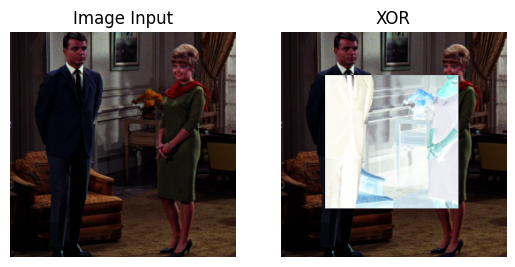

In [36]:
# Membaca citra asli
ori = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

# Membuat mask sebagai contoh untuk operasi XOR (kotak putih di tengah)
mask = np.zeros_like(ori, dtype=np.uint8)
cv.rectangle(mask, (50, 50), (200, 200), (255, 255, 255), -1)

# Melakukan operasi XOR pada citra dengan mask
masked_xor = cv.bitwise_xor(ori, mask)

# Menampilkan gambar asli
plt.subplot(1, 2, 1)  # Mengatur subplot 1 baris, 2 kolom, posisi pertama
plt.imshow(cv.cvtColor(ori, cv.COLOR_BGR2RGB))
plt.title('Image Input')
plt.axis('off')

# Menampilkan hasil operasi XOR
plt.subplot(1, 2, 2)  # Posisi kedua dari subplot
plt.imshow(cv.cvtColor(masked_xor, cv.COLOR_BGR2RGB))
plt.title('XOR')
plt.axis('off')

# Menampilkan kedua gambar
plt.show()

### Hasil Analisa

Berikut adalah analisis dari berbagai operasi bitwise (`NOT`, `OR`, `AND`, `NAND`, `XOR`) yang diterapkan pada gambar asli (`ori`) menggunakan sebuah mask berbentuk kotak putih:

### 1. **NOT**
- Operasi `NOT` membalik setiap bit dari citra asli.
- Dalam konteks gambar, setiap piksel yang memiliki nilai RGB akan dibalik sehingga warna-warna terang menjadi gelap dan sebaliknya.
- Hasilnya adalah gambar negatif dari citra asli, yang menonjolkan kontras antara bagian terang dan gelap.

### 2. **OR**
- Operasi `OR` pada gambar `ori` dan mask kotak putih memberikan efek menambahkan nilai piksel.
- Karena mask yang digunakan adalah kotak putih (nilai piksel maksimal), bagian yang berada di dalam area mask akan menjadi lebih terang.
- Bagian di dalam kotak berubah menjadi putih, dan sisa gambar tetap sama, menghasilkan kontras yang jelas antara area bertopeng dan tidak bertopeng.

### 3. **AND**
- Operasi `AND` menghasilkan citra di mana hanya bagian yang bertumpang tindih dengan mask putih yang tetap ada, sedangkan area di luar mask menjadi hitam.
- Ini berarti area yang tidak tertutupi oleh kotak putih dalam mask menjadi nol, menghasilkan piksel hitam sepenuhnya.
- Hasil ini mengisolasi bagian dari gambar yang sesuai dengan bentuk mask, memberikan tampilan yang seolah-olah sebagian gambar tersembunyi.

### 4. **NAND**
- Operasi `NAND` adalah kebalikan dari `AND`. Setelah operasi `AND` dilakukan, hasilnya dibalik menggunakan operasi `NOT`.
- Pada hasil `NAND`, semua area di luar mask menjadi putih, dan bagian dalam mask menjadi terbalik.
- Ini menciptakan efek di mana area di luar kotak putih berubah menjadi terang, sedangkan area dalam mask berubah menjadi negatif.

### 5. **XOR**
- Operasi `XOR` menghasilkan citra di mana piksel yang berbeda antara `ori` dan `mask` tetap terlihat, sementara piksel yang sama menjadi nol (hitam).
- Hasilnya adalah kontras antara area dalam kotak putih dan area lainnya. Bagian di dalam kotak menjadi gabungan antara citra asli dan mask, sedangkan bagian yang berada di luar kotak tetap seperti semula.
- Hasil ini memberikan efek menonjolkan perbedaan antara dua gambar.

### **Kesimpulan Analisis**:
- Setiap operasi bitwise memiliki efek yang berbeda tergantung pada tujuan pengolahan gambar.
- **`NOT`** digunakan untuk membalikkan gambar, menciptakan efek negatif.
- **`OR`** dapat digunakan untuk menambahkan informasi (misalnya, menerangi bagian tertentu dari gambar).
- **`AND`** berfungsi untuk menutupi sebagian dari gambar, hanya mempertahankan bagian yang diinginkan.
- **`NAND`** adalah kebalikan dari `AND` yang memberikan hasil negatif untuk bagian dalam mask.
- **`XOR`** berfungsi untuk menonjolkan perbedaan antara gambar dan mask, menghasilkan kontras di area yang berbeda.


